# MUHAMMAD RIZQI RAMADHAN
# 1301193325
# IF-42-GAB06

# Install & import library

In [1]:
!pip install geoplot
!pip install geopandas
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
from IPython.display import Image
import pathlib
import datetime
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import mapclassify as mc
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [2]:
!gdown --id 1ujM3v2x-laJtDqpxQV6pR1zVV7LjNJOy
!gdown --id 169Cz6p7EmubqPM0ckMk9dmQ1KpQWz6BO

Downloading...
From: https://drive.google.com/uc?id=1ujM3v2x-laJtDqpxQV6pR1zVV7LjNJOy
To: /content/dataset_covid_indonesia_as_05012021.csv
100% 226k/226k [00:00<00:00, 7.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=169Cz6p7EmubqPM0ckMk9dmQ1KpQWz6BO
To: /content/data_prov.zip
100% 750k/750k [00:00<00:00, 11.9MB/s]


In [3]:
!unzip 'data_prov.zip'

Archive:  data_prov.zip
replace data_prov/indonesia_province_border.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: data_prov/indonesia_province_border.cpg  
  inflating: data_prov/indonesia_province_border.dbf  
  inflating: data_prov/indonesia_province_border.prj  
  inflating: data_prov/indonesia_province_border.qpj  
  inflating: data_prov/indonesia_province_border.shp  
  inflating: data_prov/indonesia_province_border.shx  


In [4]:
indo = gpd.read_file("data_prov/indonesia_province_border.shp")
indo.head()

,No,Kode_Prov,Provinsi,geometry
0,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ..."
1,22.0,53,NUSA TENGGARA TIMUR,"MULTIPOLYGON (((122.65419 -8.63712, 122.62966 ..."
2,25.0,63,KALIMANTAN SELATAN,"MULTIPOLYGON (((114.88632 -2.50353, 114.91290 ..."
3,27.0,65,KALIMANTAN UTARA,"MULTIPOLYGON (((116.58930 4.37422, 116.61513 4..."
4,30.0,76,SULAWESI BARAT,"MULTIPOLYGON (((119.86380 -1.96121, 119.87027 ..."


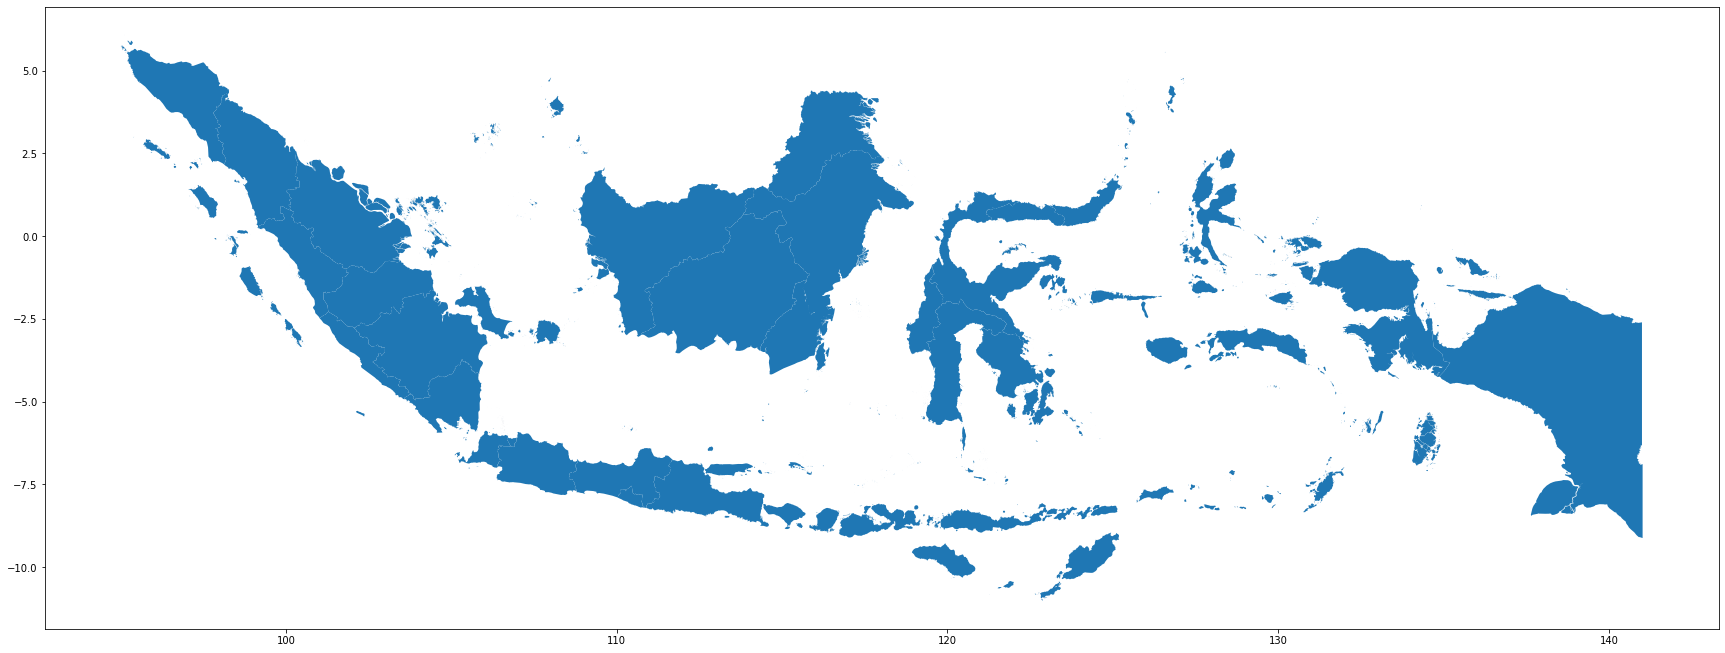

In [5]:
indo.plot(figsize=(30,18))

In [6]:
#Membagi beberapa provinsi berdasarkan pulau pulau besar di Indonesia

Sumatera = [
            'ACEH', 'SUMATERA UTARA', 'KEPULAUAN RIAU', 'SUMATERA BARAT', 'JAMBI', 'SUMATERA SELATAN',
            'BENGKULU', 'LAMPUNG', 'KEPULAUAN BANGKA BELITUNG', 'RIAU'
]

Jawa = [
        'DKI JAKARTA', 'BANTEN', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'DAERAH ISTIMEWA YOGYAKARTA',
        'BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR'
]

Kalimantan = ['KALIMANTAN BARAT', 'KALIMANTAN TIMUR', 'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN UTARA']

Sulawesi = [
            'SULAWESI UTARA', 'GORONTALO', 'SULAWESI TENGAH', 'SULAWESI BARAT', 'SULAWESI SELATAN',
            'SULAWESI TENGGARA'
]

Papua = ['MALUKU UTARA', 'MALUKU', 'PAPUA', 'PAPUA BARAT']


Cari minmax untuk setiap dataset yang akan digunakan sebagai batas bawah dan batas atas dari colorbar

In [7]:
df = pd.read_csv('dataset_covid_indonesia_as_05012021.csv')
df.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,01/05/2021,DKI JAKARTA,926,15,793,118,409505,395703,6661,7141
1,01/05/2021,JAWA BARAT,754,5,760,-11,281958,247334,3750,30874
2,01/05/2021,JAWA TIMUR,231,21,202,8,147976,135203,10718,2055
3,01/05/2021,JAWA TENGAH,201,20,231,-50,184943,165673,8427,10843
4,01/05/2021,SULAWESI SELATAN,25,0,16,9,61520,60242,935,343


In [8]:
df = pd.read_csv('dataset_covid_indonesia_as_05012021.csv')
min_indo = min(df['Daily_Case'])
max_indo = max(df['Daily_Case'])
df.describe()

,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,597.329154,20.082955,512.754068,64.492131,71007.809282,61161.599627,1970.118698,7876.090958
std,1375.239572,54.005240,1426.915239,933.085105,129103.446126,114511.474716,3718.455049,16128.927136
min,0.000000,0.000000,0.000000,-16623.000000,4417.000000,4147.000000,42.000000,21.000000
25%,54.000000,1.000000,30.000000,-23.000000,12990.000000,11402.000000,242.000000,1057.000000
50%,161.000000,4.000000,116.000000,17.000000,23975.000000,19243.000000,661.000000,2583.000000
75%,499.000000,15.000000,367.000000,132.000000,58718.000000,49197.000000,1499.000000,7279.000000
max,14622.000000,544.000000,20602.000000,9540.000000,842610.000000,820650.000000,26324.000000,129731.000000


In [14]:
df_Kalimantan = pd.DataFrame()
for i in range(len(Kalimantan)):
  df_Kalimantan = df_Kalimantan.append(df[(df['Province'] == Kalimantan[i])])
min_Kalimantan = min(df_Kalimantan['Daily_Case'])
max_Kalimantan = max(df_Kalimantan['Daily_Case'])

In [11]:
df_Sumatera = pd.DataFrame()
for i in range(len(Sumatera)):
  df_Sumatera = df_Sumatera.append(df[(df['Province'] == Sumatera[i])])
min_Sumatera = min(df_Sumatera['Daily_Case'])
max_Sumatera = max(df_Sumatera['Daily_Case'])

In [15]:
df_Jawa = pd.DataFrame()
for i in range(len(Jawa)):
  df_Jawa = df_Jawa.append(df[(df['Province'] == Jawa[i])])
min_Jawa = min(df_Jawa['Daily_Case'])
max_Jawa = max(df_Jawa['Daily_Case'])

In [16]:
df_Sulawesi = pd.DataFrame()
for i in range(len(Sulawesi)):
  df_Sulawesi = df_Sulawesi.append(df[(df['Province'] == Sulawesi[i])])
min_Sulawesi = min(df_Sulawesi['Daily_Case'])
max_Sulawesi = max(df_Sulawesi['Daily_Case'])

In [17]:
df_Papua = pd.DataFrame()
for i in range(len(Papua)):
  df_Papua = df_Papua.append(df[(df['Province'] == Papua[i])])
min_Papua = min(df_Papua['Daily_Case'])
max_Papua = max(df_Papua['Daily_Case'])

# Merging 2 dataset

In [18]:
#Penggabungan dataset agar file shp memiliki data dari dataset csv
df = indo.set_index('Provinsi').join(df.set_index('Province'))
df.head()

,No,Kode_Prov,geometry,Date,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
ACEH,1.0,11,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5...",01/05/2021,124,2,119,3,11169,9733,442,994
ACEH,1.0,11,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5...",02/05/2021,68,7,53,8,11237,9786,449,1002
ACEH,1.0,11,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5...",03/05/2021,56,1,14,41,11293,9800,450,1043
ACEH,1.0,11,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5...",04/05/2021,98,5,9,84,11391,9809,455,1127
ACEH,1.0,11,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5...",05/05/2021,91,6,18,67,11482,9827,461,1194


# Fungsi untuk Plot daerah yang terkena covid

In [19]:
def plot_covid(anim_path, kolom, date, min, max, title, list_prov = [], n = 10):  
    #jika list_prov berdasarkan provinsi tertentu maka dataframe hanya mengambil provinsi tertentu
    if len(list_prov) != 0:
       df_covid = df.loc[list_prov]
       df_covid = df_covid.loc[df_covid['Date'] == date]
    else:
       df_covid = df.loc[df['Date'] == date]

    #inisialisasi colormap yang  digunakan untuk colormap
    colormap = cm.get_cmap('RdYlGn_r', n)

    #inisialisasi variabel untuk map scalar data ke RGBA
    convert_scalar = plt.cm.ScalarMappable(cmap = colormap,
         norm = plt.Normalize(vmin=min,vmax=max))

    #plot hasil
    fig, ax = plt.subplots(1, figsize=(32, 8))
    df_covid.plot(column=kolom, ax=ax, cmap=colormap)

    #inisialisasi dan perhitungan colorbar
    cb_min = int(np.floor(min))           
    cb_max = int(np.ceil(max))  
    ticks = [cb_min, cb_max]
    for i in range(1, n):
        ticks.append(int(i*(cb_max - cb_min) / n + cb_min))

    #plot colorbar
    colorbar = fig.colorbar(convert_scalar)
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels(ticks)

    #convert tanggal ke format dd-mm-yyyy dari dd/mm/yyyy
    date = datetime.datetime.strptime(date, '%d/%m/%Y')
    date = date.strftime("%d-%m-%Y")

    #set title
    plt.title(f'Daily Positive Case di {title} Pada Tanggal {date}', fontsize=16, pad=16)

    #set namafile dan save file
    file_name = f'{anim_path}/{date}.png'
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
    plt.close(fig)

    return file_name


# Inisialisasi direktori untuk simpan file hasil

In [20]:
#direktori untuk hasil seluruh indonesia
path = pathlib.Path("hasil/")
path.mkdir(parents=True, exist_ok=True)

#direktori untuk hasil daerah sumatera
path_Sumatera = pathlib.Path("hasil/Sumatera")
path_Sumatera.mkdir(parents=True, exist_ok=True)

#direktori untuk hasil daerah jawa
path_Jawa = pathlib.Path("hasil/Jawa")
path_Jawa.mkdir(parents=True, exist_ok=True)

#direktori untuk hasil daerah kalimantan
path_Kalimantan = pathlib.Path("hasil/Kalimantan")
path_Kalimantan.mkdir(parents=True, exist_ok=True)

#direktori untuk hasil daerah sulawesi
path_Sulawesi = pathlib.Path("hasil/Sulawesi")
path_Sulawesi.mkdir(parents=True, exist_ok=True)

#direktori untuk hasil daerah papua
path_Papua = pathlib.Path("hasil/Papua")
path_Papua.mkdir(parents=True, exist_ok=True)

In [21]:
#inisialisasi range dari date yang diambil (data csv dari tanggal 1 mei 2021 sampai 18 agustus 2021)
date_range = [x.strftime('%d/%m/%Y') for x in pd.date_range("05-01-2021", "08-18-2021")]
print(date_range)

['01/05/2021', '02/05/2021', '03/05/2021', '04/05/2021', '05/05/2021', '06/05/2021', '07/05/2021', '08/05/2021', '09/05/2021', '10/05/2021', '11/05/2021', '12/05/2021', '13/05/2021', '14/05/2021', '15/05/2021', '16/05/2021', '17/05/2021', '18/05/2021', '19/05/2021', '20/05/2021', '21/05/2021', '22/05/2021', '23/05/2021', '24/05/2021', '25/05/2021', '26/05/2021', '27/05/2021', '28/05/2021', '29/05/2021', '30/05/2021', '31/05/2021', '01/06/2021', '02/06/2021', '03/06/2021', '04/06/2021', '05/06/2021', '06/06/2021', '07/06/2021', '08/06/2021', '09/06/2021', '10/06/2021', '11/06/2021', '12/06/2021', '13/06/2021', '14/06/2021', '15/06/2021', '16/06/2021', '17/06/2021', '18/06/2021', '19/06/2021', '20/06/2021', '21/06/2021', '22/06/2021', '23/06/2021', '24/06/2021', '25/06/2021', '26/06/2021', '27/06/2021', '28/06/2021', '29/06/2021', '30/06/2021', '01/07/2021', '02/07/2021', '03/07/2021', '04/07/2021', '05/07/2021', '06/07/2021', '07/07/2021', '08/07/2021', '09/07/2021', '10/07/2021', '11/0

# Plot data kedalam file dan dimasukkan ke direktori masing masing

In [23]:
#inisialisasi list untuk menyimpan hasil plottingan
list_files_all, list_files_Sumatera, list_files_Jawa,  = [], [], []
list_files_Sulawesi, list_files_Papua, list_files_Kalimantan = [], [], []

#plot semua data dan append ke list masing masing
for i in tqdm(range(len(date_range))):
    list_files_all.append(plot_covid(path, 'Daily_Case', date_range[i], min_indo, max_indo, 'Seluruh Indonesia'))
    list_files_Sumatera.append(plot_covid(path_Sumatera, 'Daily_Case', date_range[i], min_Sumatera, max_Sumatera, 'Daerah Pulau Sumatera', Sumatera))
    list_files_Jawa.append(plot_covid(path_Jawa, 'Daily_Case', date_range[i], min_Jawa, max_Jawa, 'Daerah Jawa, Bali dan Nusa Tenggara', Jawa))
    list_files_Kalimantan.append(plot_covid(path_Kalimantan, 'Daily_Case', date_range[i], min_Kalimantan, max_Kalimantan, 'Daerah Kalimantan', Kalimantan))
    list_files_Sulawesi.append(plot_covid(path_Sulawesi, 'Daily_Case', date_range[i], min_Sulawesi, max_Sulawesi, 'Daerah Sulawesi', Sulawesi))
    list_files_Papua.append(plot_covid(path_Papua, 'Daily_Case', date_range[i], min_Papua, max_Papua, 'Daerah Papua dan Maluku', Papua))
print('\nDone!')

100%|██████████| 110/110 [09:30<00:00,  5.19s/it]


Done!


# Buat gif dari semua hasil yang sudah dihasilkan

In [24]:
#menggabungkan semua file untuk masing masing list ke menjadi gif
img_result = [imageio.imread(file_name) for file_name in list_files_all]
img_result_Sulawesi = [imageio.imread(file_name) for file_name in list_files_Sulawesi]
img_result_Sumatera = [imageio.imread(file_name) for file_name in list_files_Sumatera]
img_result_Jawa = [imageio.imread(file_name) for file_name in list_files_Jawa]
img_result_Kalimantan = [imageio.imread(file_name) for file_name in list_files_Kalimantan]
img_result_Papua = [imageio.imread(file_name) for file_name in list_files_Papua]

#save hasil gif ke direktori dengan 2 frame per detik
imageio.mimsave("covid_daily_case_indonesia.gif", img_result, fps=2)
imageio.mimsave("covid_daily_case_Sulawesi.gif", img_result_Sulawesi, fps=2)
imageio.mimsave("covid_daily_case_Sumatera.gif", img_result_Sumatera, fps=2)
imageio.mimsave("covid_daily_case_Jawa.gif", img_result_Jawa, fps=2)
imageio.mimsave("covid_daily_case_Kalimantan.gif", img_result_Kalimantan, fps=2)
imageio.mimsave("covid_daily_case_Papua.gif", img_result_Papua, fps=2)
print('Done!')

Done!


# Output

In [25]:
Image(open('covid_daily_case_indonesia.gif', 'rb').read())

Output hidden; open in https://colab.research.google.com to view.

In [26]:
Image(open('covid_daily_case_Sulawesi.gif', 'rb').read())

Output hidden; open in https://colab.research.google.com to view.

In [27]:
Image(open('covid_daily_case_Sumatera.gif', 'rb').read())

Output hidden; open in https://colab.research.google.com to view.

In [28]:
Image(open('covid_daily_case_Jawa.gif', 'rb').read())

Output hidden; open in https://colab.research.google.com to view.

In [29]:
Image(open('covid_daily_case_Kalimantan.gif', 'rb').read())

Output hidden; open in https://colab.research.google.com to view.

In [30]:
Image(open('covid_daily_case_Papua.gif', 'rb').read())

Output hidden; open in https://colab.research.google.com to view.